# InSituPy demonstration - Add annotations

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import XeniumData

## Previous steps

1. Download the example data for demonstration: [01_InSituPy_demo_download_data.ipynb](./01_InSituPy_demo_download_data.ipynb)
2. Register images from external stainings: [02_InSituPy_demo_register_images.ipynb](./02_InSituPy_demo_register_images.ipynb)
3. Visualize data with napari and do preprocessing steps: [03_InSituPy_demo_analyze.ipynb](./03_InSituPy_demo_analyze.ipynb)

At this point, the structure of the data should look like this:

    ```
    ./demo_dataset
    ├───cropped_processed
    ├───output-XETG00000__slide_id__sample_id
    │   ├───analysis
    │   │   ├───clustering
    │   │   ├───diffexp
    │   │   ├───pca
    │   │   ├───tsne
    │   │   └───umap
    │   └───cell_feature_matrix
    ├───registered_images
    ├───registration_qc
    └───unregistered_images
    ```


## Load Xenium data into `XeniumData` object

Now the Xenium data can be parsed by providing the data path to `XeniumData`

In [3]:
# prepare paths
data_dir = Path("../demo_dataset") # output directory
xenium_dir = data_dir / "output-XETG00000__slide_id__sample_id" # directory of xenium data
image_dir = data_dir / "unregistered_images" # directory of images

In [4]:
xd = XeniumData(xenium_dir)

In [5]:
xd

XeniumData
Slide ID:	slide_id
Sample ID:	sample_id
Data path:	..\demo_dataset
Data folder:	output-XETG00000__slide_id__sample_id
Metadata file:	experiment_modified.xenium

In [6]:
# read all data modalities at once
xd.read_all()

# alternatively, it is also possible to read each modality separately
# xd.read_matrix()
# xd.read_images()
# xd.read_boundaries()
# xd.read_transcripts()
# xd.read_annotations()

No `annotations` modality found.
Reading boundaries...
Reading images...
Reading matrix...
Reading transcripts...


Note: That the `annotations` modality is not found here is expected. Annotations are added in a later step.

In [7]:
xd

XeniumData
Slide ID:	slide_id
Sample ID:	sample_id
Data path:	..\demo_dataset
Data folder:	output-XETG00000__slide_id__sample_id
Metadata file:	experiment_modified.xenium
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ matrix
       AnnData object with n_obs × n_vars = 167780 × 313
	       obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
	       var: 'gene_ids', 'feature_types', 'genome'
	       obsm: 'spatial'
    ➤ transcripts
	   DataFrame with shape 42638083 x 8
    ➤ boundaries
       cells
       nuclei

## Load annotations

For the analysis of spatial transcriptomic datasets the inclusion of annotations from experts of disease pathology is key. Here, we demonstrate how to annotate data in [QuPath](https://qupath.github.io/), export the annotations as `.geojson` file and import them into the `XeniumData` object.

### Create annotations in QuPath

To create annotations in QuPath, follow these steps:

1. Select a annotation tool from the bar on the top left:

<center><img src="../demo_annotations/qupath_annotation_buttons.png"/></center>

2. Add as many annotations as you want and label them by setting classes in the annotation list. Do not forget to press the "Set class" button:

<center><img src="../demo_annotations/qupath_annotation_list.png"/></center>

3. Export annotations using `File > Export objects as GeoJSON`. Tick `Pretty JSON` to get an easily readable JSON file. The file name needs to have following structure: `annotation-{slide_id}__{sample_id}__{annotation_label}`.

### Import annotations into `XeniumData`

For demonstration purposes, we created a dummy annotation file in `./demo_annotations/`. To add the annotations to `XeniumData` follow the steps below.



In [170]:
xd.read_annotations(annotation_dir="../demo_annotations/")

Reading annotations...


In [171]:
xd

XeniumData
Slide ID:	slide_id
Sample ID:	sample_id
Data path:	..\demo_dataset
Data folder:	output-XETG00000__slide_id__sample_id
Metadata file:	experiment_modified.xenium
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ matrix
       AnnData object with n_obs × n_vars = 167780 × 313
	       obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
	       var: 'gene_ids', 'feature_types', 'genome'
	       obsm: 'spatial'
    ➤ transcripts
	   DataFrame with shape 42638083 x 8
    ➤ boundaries
       cells
       nuclei
    ➤ annotations
       demo:	4 annotations, 2 classes ('Positive', 'Negative') 
       demo2:	5 annotations, 3 classes ('Negative', 'Positive', 'Other') 

In [172]:
xd.annotations.metadata

{'demo': {'n_annotations': 4,
  'classes': array(['Positive', 'Negative'], dtype=object),
  'analyzed': ''},
 'demo2': {'n_annotations': 5,
  'classes': array(['Negative', 'Positive', 'Other'], dtype=object),
  'analyzed': ''}}

### Visualize annotations using napari

In [173]:
import warnings
warnings.filterwarnings('error')

In [174]:
xd.show(annotation_labels="demo2")

In [178]:
xd.annotations.demo2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [179]:
import geopandas

In [193]:
file = r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\annotation-slide_id__sample_id__demo.geojson"
df = geopandas.read_file(file)

In [194]:
df.set_crs(4326)

,id,objectType,classification,geometry
0,bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"{'name': 'Positive', 'color': [250, 62, 62]}","POLYGON ((8863.00000 10814.00000, 8863.00000 1..."
1,69814505-4059-42cd-8df2-752f7eb0810d,annotation,"{'name': 'Positive', 'color': [250, 62, 62]}","POLYGON ((13096.00000 12492.00000, 13072.40000..."
2,1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"{'name': 'Negative', 'color': [112, 112, 225]}","POLYGON ((30975.26000 22938.00000, 30982.00000..."
3,19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"{'name': 'Negative', 'color': [112, 112, 225]}","POLYGON ((31165.00000 16408.00000, 31149.00000..."


In [195]:
xd.store_annotations()

Negative
demo2
Positive
demo2
Other
demo2


In [196]:
xd.annotations.demo2

,objectType,geometry,name,color,origin
id,,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]",file
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]",file
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]",file
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]",file
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]",file
6928a7a6-c201-4564-af9f-24f0781ae2ef,annotation,"POLYGON ((7635.78004 5876.87989, 7396.29395 61...",Other,"[255, 200, 0]",manual
75db5bce-b32f-4cac-9760-6accbc7f5404,annotation,"POLYGON ((12984.30266 12156.73730, 12771.42614...",Other,"[255, 200, 0]",manual
30963298-8fb8-4c71-a14d-c6bb6ba5dad7,annotation,"POLYGON ((17827.24355 6488.89990, 17481.31920 ...",Other,"[255, 200, 0]",manual
b3158bbd-500b-4dad-86db-9fdbf4e27205,annotation,"POLYGON ((13410.05571 6355.85207, 13090.74092 ...",Other,"[255, 200, 0]",manual


In [168]:
xd.annotations.newlabel

,objectType,geometry,name,color,origin
id,,,,,
92902415-28af-4a3d-9486-2a858934934b,annotation,"POLYGON ((16017.408 6985.425, 15576.514 7524.2...",newclass,"[255, 0, 0]",manual
73ccc998-06ce-43d9-ab1d-10dda0b78476,annotation,"POLYGON ((27137.723 5907.685, 26990.758 7377.3...",newclass,"[255, 0, 0]",manual
7c3c0d48-e4ce-4a42-961d-af66b2592d27,annotation,"POLYGON ((15233.597 14088.710, 14890.680 15509...",newclass,"[255, 0, 0]",manual


In [169]:
xd.show(annotation_labels="all")

In [155]:
ar = xd.viewer.layers["*newclass2 (newlabel)"].data[0]

In [159]:
import numpy as np

In [161]:
np.stack([ar[:, 1], ar[:, 0]], axis=1)

array([[2660.29714647,  706.44008882],
       [2920.54681355,  550.29028858],
       [3336.94628086,  581.52024863],
       [3503.50606779,  800.12996897],
       [3545.14601452, 1029.14967599],
       [3368.17624091, 1112.42956945],
       [2826.8569334 , 1185.29947623],
       [2608.24721306, 1122.83955614],
       [2483.32737286, 1018.73968931]])

In [153]:
xd.viewer.layers["*newclass2 (newlabel)"].data[0][:, 0]

array([ 706.44008882,  550.29028858,  581.52024863,  800.12996897,
       1029.14967599, 1112.42956945, 1185.29947623, 1122.83955614,
       1018.73968931])

In [108]:
xd.annotations.newlabel

,objectType,geometry,name,color,origin
id,,,,,
e210beae-f5fe-4ac7-b22c-daf6c0cf7dd5,annotation,"POLYGON ((206.756 379.869, 206.756 525.219, 29...",newclass,"[1.0, 0.0, 0.0, 1.0]",manual
c3145bd2-a031-483b-95d3-d6353c32975a,annotation,"POLYGON ((304.645 1121.451, 304.645 1349.858, ...",newclass,"[1.0, 0.0, 0.0, 1.0]",manual
b70b0e77-039e-4e23-ad05-beff5dd3fe9c,annotation,"POLYGON ((794.089 397.667, 794.089 557.849, 90...",newclass,"[1.0, 0.0, 0.0, 1.0]",manual
9a7909df-a678-480d-bd6b-1aec4c864389,annotation,"POLYGON ((452.961 204.856, 515.254 178.159, 55...",newclass,"[1.0, 0.0, 0.0, 1.0]",manual
96cdf9f9-e2e8-418e-a055-754d23505814,annotation,"POLYGON ((236.419 605.310, 334.308 611.242, 39...",secondclass,"[0.0, 0.0, 1.0, 1.0]",manual
37077cb7-e3e1-4460-b807-b95f8dd4405c,annotation,"POLYGON ((209.722 961.269, 260.150 919.741, 31...",secondclass,"[0.0, 0.0, 1.0, 1.0]",manual


In [109]:
xd.annotations.demo2

,objectType,geometry,name,color,origin
id,,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]",file
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]",file
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]",file
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]",file
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]",file
24b9db2b-05f8-422c-8dde-b92dd9c3a2db,annotation,"POLYGON ((369.90390 462.92608, 467.79272 439.1...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual
9c863fae-40c5-4561-a72a-a449cbd3df25,annotation,"POLYGON ((384.73554 658.70371, 384.73554 958.3...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual
b9d164f9-2b05-4055-bede-e046b703095f,annotation,"POLYGON ((494.48966 1162.97941, 580.51317 1133...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual
3517bcc1-f915-4fc0-a4fe-7a974f3ae6c5,annotation,"POLYGON ((740.69486 667.60269, 797.05509 652.7...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual


In [84]:
xd.annotations.demo2

,objectType,geometry,name,color,origin
id,,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]",file
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]",file
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]",file
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]",file
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]",file
268d0c72-0b42-4790-9f61-4712e6cdb9ab,annotation,"POLYGON ((1371.54196 670.72323, 1371.54196 226...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual
2fac0953-e562-4c10-815e-f8c2da57f939,annotation,"POLYGON ((1595.91351 3054.67093, 1595.91351 44...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual
100bfda9-15ad-4eec-a2c5-cdeaaacc7164,annotation,"POLYGON ((838.65953 2311.44018, 1063.03108 231...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual
b0d821bf-7bf4-40c6-a92e-a15cc6500b4f,annotation,"POLYGON ((1371.54196 5256.31675, 1497.75095 51...",Other,"[1.0, 0.7843137383460999, 0.0, 1.0]",manual


c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\geopandas\geoseries.py:628: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


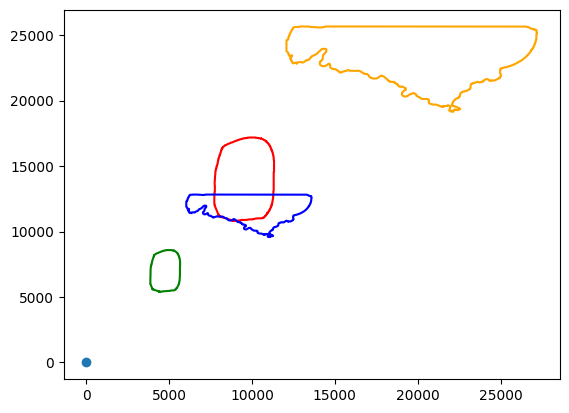

In [29]:
import matplotlib.pyplot as plt
from shapely.affinity import scale

p = xd.annotations.demo.geometry[0]
p_scaled = scale(p, xfact=0.5, yfact=0.5, 
                 origin=(0,0)
                 )
p2 = xd.annotations.demo2.geometry[2]
p2_scaled = scale(p2, xfact=0.5, yfact=0.5, 
                 origin=(0,0)
)


plt.plot(*p.exterior.xy, c='red')
plt.plot(*p_scaled.exterior.xy, c='green')
for geom in p2.geoms:
    plt.plot(*geom.exterior.xy, c='orange')
for geom in p2_scaled.geoms:
    plt.plot(*geom.exterior.xy, c='blue')

plt.scatter(0, 0)

In [30]:
from shapely import MultiPolygon

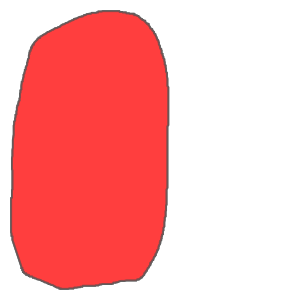

In [37]:
MultiPolygon([p, p, p])

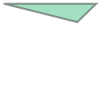

In [28]:
p2_scaled.geoms[1]

In [112]:
xd.store_annotations()

Positive
demo
Negative
demo
Negative
demo2
Positive
demo2
Other
demo2
class
label
class2
label


In [120]:
df1["geometry"][0] * 1000

C:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\geopandas\geoseries.py:628: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


TypeError: unsupported operand type(s) for *: 'Polygon' and 'int'

# Problem scale factor: When reading the annotations we should directly apply the scale factor. Problem: how to apply the scale factor correctly to the shapely Polygons? Like here? https://stackoverflow.com/questions/72786576/how-to-scale-polygon-using-shapely - with origin (0,0)?

xd.annotations.metadata

In [110]:
xd.annotations

annotations
demo:	4 annotations, 2 classes ('Positive', 'Negative') 
demo2:	5 annotations, 3 classes ('Negative', 'Positive', 'Other') 
label:	4 annotations, 1 classes ('class',) 

In [65]:
xd.annotations

annotations
demo:	4 annotations, 2 classes ('Positive', 'Negative') 
demo2:	5 annotations, 3 classes ('Negative', 'Positive', 'Other') 
label:	5 annotations, 1 classes ('class',) 

In [72]:
import pandas as pd
from geopandas import GeoDataFrame

In [37]:
df1 = xd.annotations.demo.set_index("id").copy()
df2 = xd.annotations.demo2.set_index("id").copy()

In [67]:
df1.index

Index(['bd3aacca-1716-4df8-91dd-bf8f6413a7bd',
       '69814505-4059-42cd-8df2-752f7eb0810d',
       '1957cd32-0a21-4b45-9dae-ecf236217140',
       '19d2197a-1b8e-456f-8223-fba74641ac1c'],
      dtype='object', name='id')

In [78]:
d = df1.to_dict()

In [85]:
pd.concat([df1, df2])

,objectType,geometry,name,color
id,,,,
bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((8863.00000 10814.00000, 8863.00000 1...",Positive,"[250, 62, 62]"
69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((13096.00000 12492.00000, 13072.40000...",Positive,"[250, 62, 62]"
1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((30975.26000 22938.00000, 30982.00000...",Negative,"[112, 112, 225]"
19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((31165.00000 16408.00000, 31149.00000...",Negative,"[112, 112, 225]"
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]"
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]"
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]"
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]"
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]"


In [101]:
ddf = pd.concat([df1, df1])
ddff = pd.concat([df1, df2])

In [95]:
~ddf.index.duplicated()

array([ True,  True,  True,  True, False, False, False, False])

In [94]:
ddf[~ddf.index.duplicated()]

,objectType,geometry,name,color
id,,,,
bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((8863.00000 10814.00000, 8863.00000 1...",Positive,"[250, 62, 62]"
69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((13096.00000 12492.00000, 13072.40000...",Positive,"[250, 62, 62]"
1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((30975.26000 22938.00000, 30982.00000...",Negative,"[112, 112, 225]"
19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((31165.00000 16408.00000, 31149.00000...",Negative,"[112, 112, 225]"


In [100]:
set(df1.index).symmetric_difference(set(df2.index))

{'1957cd32-0a21-4b45-9dae-ecf236217140',
 '1970eccb-ad38-4b4b-b7a8-54509027b57d',
 '19d2197a-1b8e-456f-8223-fba74641ac1c',
 '69814505-4059-42cd-8df2-752f7eb0810d',
 '92bfe928-a21f-4864-b7cb-f0d300113d88',
 'a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa',
 'a6c17a54-6839-40b2-8531-c9227635f344',
 'bd3aacca-1716-4df8-91dd-bf8f6413a7bd',
 'e78efe2f-d185-4ab6-9cc9-6621897f3662'}

In [102]:
set(df1.index).symmetric_difference(set(ddff.index))

{'1970eccb-ad38-4b4b-b7a8-54509027b57d',
 '92bfe928-a21f-4864-b7cb-f0d300113d88',
 'a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa',
 'a6c17a54-6839-40b2-8531-c9227635f344',
 'e78efe2f-d185-4ab6-9cc9-6621897f3662'}

In [98]:
df2

,objectType,geometry,name,color
id,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]"
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]"
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]"
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]"
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]"


In [41]:
pd.concat([df1, df2])

,objectType,geometry,name,color
id,,,,
bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((8863.00000 10814.00000, 8863.00000 1...",Positive,"[250, 62, 62]"
69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((13096.00000 12492.00000, 13072.40000...",Positive,"[250, 62, 62]"
1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((30975.26000 22938.00000, 30982.00000...",Negative,"[112, 112, 225]"
19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((31165.00000 16408.00000, 31149.00000...",Negative,"[112, 112, 225]"
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]"
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]"
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]"
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]"
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]"


In [42]:
df2

,objectType,geometry,name,color
id,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((25319.00000 3892.00000, 25313.00000 ...",Negative,"[112, 112, 225]"
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((30950.00000 10855.00000, 30944.00000...",Positive,"[250, 62, 62]"
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((21534.00000 19541.00000, 21534...",Other,"[255, 200, 0]"
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((6501.00000 17126.00000, 6495.00000 1...",Other,"[255, 200, 0]"
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((29519.63000 18523.00000, 29476.00000...",Negative,"[112, 112, 225]"


In [19]:
xd.viewer.layers['*class (label)'].events.data

In [87]:
xd.viewer.layers['Shapes'].property_choices

{}

In [88]:
dir(xd.viewer.layers['Shapes'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_shapes',
 '_add_shapes_to_view',
 '_allow_thumbnail_update',
 '_array_like',
 '_aspect_ratio',
 '_basename',
 '_blending',
 '_clear_extent',
 '_clipboard',
 '_colors',
 '_compute_vertices_and_box',
 '_copy_data',
 '_current_edge_color',
 '_current_edge_width',
 '_current_face_color',
 '_cursor',
 '_cursor_modes',
 '_cursor_size',
 '_data_to_world',
 '_data_view',
 '_display_bounding_box',
 '_display_order_stored',
 '_double_click_modes',
 '_drag_box',
 '_drag_box_stored',
 '_drag_modes',
 '_drag_start',
 '_edge_color_cycle',
 '_edge_color_cycle_

In [54]:
xd.viewer.layers["*sfddsf (asdfsfs)"].properties['uid'] = "test"

In [57]:
l = xd.viewer.layers["*sfddsf (asdfsfs)"]

In [73]:
l.properties

{}

In [60]:
xd.viewer.layers["*sfddsf (asdfsfs)"].current_properties

{}

In [59]:
[elem for elem in dir(l) if "prop" in elem]

['_edge_color_property',
 '_face_color_property',
 '_update_properties',
 'block_update_properties',
 'current_properties',
 'properties',
 'property_choices']

In [75]:
xd.viewer.layers["Other (demo2)"].current_properties['uid']

array(['a6c17a54-6839-40b2-8531-c9227635f344'], dtype=object)

In [77]:
from uuid import uuid4

In [80]:
np.array([str(uuid4())], dtype='object')

array(['0836db83-cb90-4c43-b7a5-e9742fe10106'], dtype=object)

In [66]:
xd.viewer.layers["Other (demo2)"].property_choices

{}

In [68]:
l._update_properties

True

In [62]:
xd.viewer.layers["Other (demo2)"].properties

{'uid': array(['92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        'a6c17a54-6839-40b2-8531-c9227635f344',
        '13f2259f-de00-40ed-b1cc-66b3a4e80806',
        '16ad4534-e4ec-4b3a-aca8-9f05d4acf264'], dtype=object)}

In [19]:
xd.viewer.layers["*class (label)"].events.add

<bound method EmitterGroup.add of <napari.utils.events.event.EmitterGroup object at 0x0000018E108F6520>>

In [20]:
xd.viewer.layers["*class (label)"].events.data

In [18]:
[elem for elem in dir(xd.viewer.layers["*class (label)"].events) if not elem.startswith("_")]

['add',
 'affine',
 'auto_connect',
 'auto_connect_format',
 'blending',
 'block',
 'block_all',
 'blocked',
 'blocker',
 'blocker_all',
 'callback_refs',
 'callbacks',
 'connect',
 'current_edge_color',
 'current_face_color',
 'current_properties',
 'cursor',
 'cursor_size',
 'data',
 'default_args',
 'deselect',
 'disconnect',
 'edge_color',
 'edge_width',
 'editable',
 'emitters',
 'event_class',
 'extent',
 'face_color',
 'feature_defaults',
 'features',
 'help',
 'highlight',
 'ignore_callback_errors',
 'interactive',
 'loaded',
 'mode',
 'mouse_pan',
 'mouse_zoom',
 'name',
 'opacity',
 'print_callback_errors',
 'properties',
 'refresh',
 'rotate',
 'scale',
 'select',
 'set_data',
 'shear',
 'source',
 'status',
 'thumbnail',
 'translate',
 'unblock',
 'unblock_all',
 'visible']

In [14]:
xd.annotations.metadata

{'demo': {'n_annotations': 4,
  'classes': array(['Positive', 'Negative'], dtype=object),
  'analyzed': ''},
 'demo2': {'n_annotations': 5,
  'classes': array(['Negative', 'Positive', 'Other'], dtype=object),
  'analyzed': ''}}

In [15]:
xd.store_annotations()

class
label


In [16]:
xd.annotations.metadata

{'demo': {'n_annotations': 4,
  'classes': array(['Positive', 'Negative'], dtype=object),
  'analyzed': ''},
 'demo2': {'n_annotations': 5,
  'classes': array(['Negative', 'Positive', 'Other'], dtype=object),
  'analyzed': ''},
 'label': {'n_annotations': 2,
  'classes': array(['class'], dtype=object),
  'analyzed': ''}}

In [17]:
from geopandas import GeoDataFrame

In [18]:
v = xd.viewer

In [19]:
l = xd.viewer.layers["*class (label)"]
lold = xd.viewer.layers["Other (demo2)"]
ll = xd.viewer.layers

In [20]:
l.properties

{}

In [21]:
lold.properties

{'uid': array(['92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        'a6c17a54-6839-40b2-8531-c9227635f344'], dtype=object)}

In [24]:
lold.properties

{'uid': array(['92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        'a6c17a54-6839-40b2-8531-c9227635f344'], dtype=object)}

In [59]:
from napari.layers.shapes.shapes import Shapes

In [62]:
%timeit isinstance(l, Shapes)

48.5 ns ± 2.21 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [63]:
%timeit "shapes" == l.as_layer_data_tuple()[-1]

133 µs ± 5.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [53]:
ll

[<Image layer 'nuclei' at 0x17aa06fddf0>, <Image layer 'CD20' at 0x17aa07c7790>, <Image layer 'HER2' at 0x17aa07d2850>, <Image layer 'HE' at 0x17b9bd3f7f0>, <Shapes layer 'Positive (demo)' at 0x17b9c00de50>, <Shapes layer 'Negative (demo)' at 0x17b9c01e580>, <Shapes layer 'Negative (demo2)' at 0x17b9c1294f0>, <Shapes layer 'Positive (demo2)' at 0x17b9c1f9640>, <Shapes layer 'Other (demo2)' at 0x17b9c342b50>, <Shapes layer '*class (label)' at 0x17b9ef069a0>]

In [45]:
len(lold.data)

10

test_string


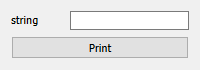

asdf


In [77]:
from magicgui import magicgui

class WidgetClass:
    def __init__(self, init_string):
        self.init_string = init_string
        print(self.init_string)
        
    # keep the function logic "pure"
    @magicgui(call_button="Print")
    def widget_demo(self, string=""):
        widget_demo.string.value = self.init_string
        if string != "":
            print(string)

    # do whatever you want after the function has been called
    # in a callback connected to the `called` signal
    @widget_demo.called.connect
    def after_call():
        widget_demo.string.value = ""
        
w = WidgetClass(init_string="test_string")
w.widget_demo.show(run=True)

In [70]:
type(widget_demo.changed)

psygnal._signal.SignalInstance

In [74]:
for elem in dir(widget_demo):
    if not elem.startswith("_"):
        print(elem)
        print(type(getattr(widget_demo, elem)))

NO_VALUE
<class 'str'>
annotation
<class 'NoneType'>
append
<class 'method'>
asdict
<class 'method'>
call_button
<class 'magicgui.widgets.PushButton'>
call_count
<class 'int'>
called
<class 'psygnal._signal.SignalInstance'>
changed
<class 'psygnal._signal.SignalInstance'>
clear
<class 'method'>
close
<class 'method'>
copy
<class 'method'>
count
<class 'method'>
enabled
<class 'bool'>
extend
<class 'method'>
from_callable
<class 'method'>
from_signature
<class 'method'>
gui_only
<class 'bool'>
height
<class 'int'>
hide
<class 'method'>
index
<class 'method'>
insert
<class 'method'>
label
<class 'str'>
label_changed
<class 'psygnal._signal.SignalInstance'>
labels
<class 'bool'>
layout
<class 'str'>
margins
<class 'tuple'>
max_height
<class 'int'>
max_width
<class 'int'>
min_height
<class 'int'>
min_width
<class 'int'>
name
<class 'str'>
native
<class 'PyQt5.QtWidgets.QWidget'>
options
<class 'dict'>
orientation
<class 'str'>
param_kind
<enum '_ParameterKind'>
parent
<class 'NoneType'>
pa

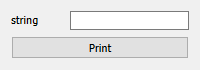

asf


In [37]:
w = WidgetClass(init_string="test_string")


## Good example how to connect layers and events

In [41]:
import napari
import numpy as np
from napari.layers.shapes.shapes import Shapes

# Create a napari viewer
viewer = napari.Viewer()

def print_event(event):
    print(event.action)
    if event is not None:
        print('added')

# Connect the function to all shapes layers in the viewer
def connect_to_all_shapes_layers(event):
    layer = event.source[event.index]
    if event is not None and isinstance(layer, Shapes):
        print('blubb')
        print(dir(layer.events))
        layer.events.data.connect(print_event)

# Connect the function to any new layers added to the viewer
viewer.layers.events.inserted.connect(connect_to_all_shapes_layers)

# Open the napari viewer
napari.run()

blubb
['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_block_counter', '_blocked', '_callback_pass_event', '_callback_refs', '_callbacks', '_check_signature', '_connect_emitters', '_emitters', '_emitters_connected', '_emitting', '_get_proper_name', '_ignore_callback_errors', '_invoke_callback', '_is_core_callback', '_normalize_cb', '_overlays', '_prepare_event', '_print_callback_errors', '_source', 'add', 'affine', 'auto_connect', 'auto_connect_format', 'blending', 'block', 'block_all', 'blocked', 'blocker', 'blocker_all', 'callback_refs', 'callbacks', 'connect', 'current_edge_color', 'current_face_color', 'c

In [37]:
import napari
import numpy as np
from napari.layers.shapes.shapes import Shapes

# Create a napari viewer
viewer = napari.Viewer()

def print_event(event):
    if event is not None:
        if event.type == 'added':
            print('Shape added')
        elif event.type == 'removed':
            print('Shape removed')

# Connect the function to all shapes layers in the viewer
def connect_to_all_shapes_layers(event):
    layer = event.source[event.index]
    if event is not None and isinstance(layer, Shapes):
        print('Connected to Shapes layer')
        layer.events.data.connect(print_event)

# Connect the function to any new layers added to the viewer
viewer.layers.events.inserted.connect(connect_to_all_shapes_layers)

# Open the napari viewer
napari.run()


Connected to Shapes layer


In [48]:
l.events.data

In [40]:
lold.properties

{'uid': array(['92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        'a6c17a54-6839-40b2-8531-c9227635f344',
        'a6c17a54-6839-40b2-8531-c9227635f344',
        'a6c17a54-6839-40b2-8531-c9227635f344'], dtype=object)}

In [39]:
lold

<Shapes layer 'Other (demo2)' at 0x17b9c342b50>

In [53]:
d = {"blubb": "test"}

In [54]:
len(d)

1

In [38]:
l.properties

{}

In [55]:
xd.annotations.demo

[autoreload of insitupy.main failed: Traceback (most recent call last):
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "C:\Users\ge37voy\Github\InSituPy\insitupy\main.py", line 315
 

,id,objectType,geometry,name,color
0,bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((8863.00000 10814.00000, 8863.00000 1...",Positive,"[250, 62, 62]"
1,69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((13096.00000 12492.00000, 13072.40000...",Positive,"[250, 62, 62]"
2,1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((30975.26000 22938.00000, 30982.00000...",Negative,"[112, 112, 225]"
3,19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((31165.00000 16408.00000, 31149.00000...",Negative,"[112, 112, 225]"


In [62]:
l.data

[array([[1203.26329718, 1974.88285835],
        [1497.75095436, 1918.78997127],
        [1708.09928091, 1960.85963658],
        [1834.30827684, 2185.2311849 ],
        [1876.37794215, 2479.71884208],
        [1778.21538976, 2662.02072509],
        [1553.84384144, 2774.20649925],
        [1259.35618427, 2732.13683394],
        [1091.07752302, 2549.83495093]]),
 array([[1848.33149861, 4316.76089396],
        [2072.70304693, 4316.76089396],
        [2226.9584864 , 4471.01633343],
        [2255.00492994, 4737.45754706],
        [2002.58693808, 4919.75943008],
        [1750.16894622, 4905.73620831],
        [1666.0296156 , 4779.52721238],
        [1736.14572445, 4625.2717729 ]]),
 array([[3727.4432158 , 3349.15859182],
        [3979.86120767, 3321.11214828],
        [4106.0702036 , 3559.50691838],
        [3769.51288111, 3671.69269254],
        [3587.2109981 , 3601.57658369],
        [3587.2109981 , 3447.32114421]])]

In [56]:
from uuid import uuid4

In [63]:
[str(uuid4()) for _ in range(4)]

['c42ccf0f-d362-4b3c-862a-a0979e7722ed',
 '45a53acf-e497-4c57-b058-9b00ca851c30',
 '4bff1810-ebe5-44c2-a37a-1ae5daa08346',
 '271e12f0-ae32-41cc-be6b-8ee11ab1d274']

In [39]:
lold.properties

{'uid': array(['92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        '92bfe928-a21f-4864-b7cb-f0d300113d88',
        'a6c17a54-6839-40b2-8531-c9227635f344'], dtype=object)}

In [68]:
len(lold.data)

5

In [71]:
mp = xd.annotations.demo2.loc[2, "geometry"]

In [63]:
l.properties

{}

In [50]:
import numpy as np

In [51]:
np.array([[1,1,2,3],
          [5,6,7,8]]).T

array([[1, 5],
       [1, 6],
       [2, 7],
       [3, 8]])

In [52]:
isinstance(df, gp.GeoDataFrame)

True

In [53]:
from shapely import Polygon

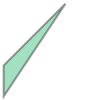

In [54]:
Polygon(np.array([[1,1,2,3],
                  [5,6,7,8]]).T)

In [55]:
import uuid

In [56]:
str(uuid.uuid4())

'863f00b7-086d-49f7-9b45-0204bcce8a9d'

In [71]:
from shapely import Point
from insitupy.io.io import parse_geopandas

d = {'id': ['i'],
                 'objectType': ['o'], 
                 'geometry': [Point(0, 1)],
                 'name': ['n'],
                 'color': ['c']
                 }
a = parse_geopandas(d)

In [72]:
from shapely import Point
from insitupy.io.io import parse_geopandas
import geopandas as gp

d = {'id': ['i'],
                 'objectType': ['o'], 
                 'name': ['n'],
                 'color': ['c'],
                 #'geometry': [Point(0, 1)]
                 }

b = gp.GeoDataFrame(d, geometry=[Point(0, 1)])

In [74]:
import pandas as pd
pd.concat([a, b])

,id,objectType,geometry,name,color
0,i,o,POINT (0.00000 1.00000),n,c
0,i,o,POINT (0.00000 1.00000),n,c


In [125]:
dd = gp.GeoDataFrame(d, geometry=d["geometry"])

In [126]:
dd.equals(dd)

True

In [ ]:
parse_geopandas()

In [115]:
gp.GeoDataFrame(d, geometry=d["geometry"])

,id,objectType,name,color,geometry
0,i,o,n,c,"MULTIPOLYGON (((21534.000 19541.000, 21534.000..."


In [58]:
row_new = gp.GeoDataFrame({'id': ['i'],
                 'objectType': ['o'],
                 'geometry': ['g'], 
                 'name': ['n'],
                 'color': ['c']})

In [59]:
l.edge_color

NameError: name 'l' is not defined

In [28]:
df = xd.annotations.demo.copy()

In [29]:
import pandas as pd

In [31]:
pd.concat([df, row_new], ignore_index=True)

,id,objectType,geometry,name,color
0,bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((8863 10814, 8863 10824, 8832 10824, ...",Positive,"[250, 62, 62]"
1,69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((13096 12492, 13072.4 12494.2, 13031 ...",Positive,"[250, 62, 62]"
2,1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((30975.26 22938, 30982 22938, 30992 2...",Negative,"[112, 112, 225]"
3,19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((31165 16408, 31149 16410, 31134 1641...",Negative,"[112, 112, 225]"
4,i,o,g,n,c


In [ ]:
xd.annotations.demo

,id,objectType,geometry,name,color
0,bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((8863.00000 10814.00000, 8863.00000 1...",Positive,"[250, 62, 62]"
1,69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((13096.00000 12492.00000, 13072.40000...",Positive,"[250, 62, 62]"
2,1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((30975.26000 22938.00000, 30982.00000...",Negative,"[112, 112, 225]"
3,19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((31165.00000 16408.00000, 31149.00000...",Negative,"[112, 112, 225]"


In [49]:
type(xd.annotations.demo)

geopandas.geodataframe.GeoDataFrame

In [36]:
l.data[0]

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [40]:
list("ABCD")[:-1]

['A', 'B', 'C']

In [38]:
xd.annotations.labels

['demo']

In [20]:
ll[0]

'nuclei'

In [18]:
from parse import *
pat = "*{Class} ({Label})"
cla = "CLASS"
lab = "LABEL"
s = pat.format(Class=cla, Label=lab)

In [19]:
s

'*CLASS (LABEL)'

In [22]:
parse(pat, x).named

NameError: name 'x' is not defined

In [23]:
parse(pat, "blubb")

In [51]:
ll.selection

Selection({<Shapes layer 'Other (demo2)' at 0x2bbf5bc8100>, <Shapes layer 'Positive (demo2)' at 0x2bbe3746190>})

In [33]:
sel = ll.selection

In [ ]:
len(sel)

1

In [43]:
sh = list(sel)[0]

In [46]:
sh.data

[array([[ 9688.22942556, 16895.30604434],
        [10104.80363213, 16697.98142018],
        [10499.45288046, 16610.28158722],
        [10959.87700351, 16588.35662898],
        [11201.05154416, 16610.28158722],
        [11442.2260848 , 16785.68125314],
        [11617.62575073, 17114.55562675],
        [11639.55070897, 17333.80520915],
        [11508.00095952, 17640.75462452],
        [11398.37616832, 17860.00420693],
        [11113.35171119, 18123.10370582],
        [10806.40229582, 18232.72849702],
        [10565.22775518, 18232.72849702],
        [10302.12825629, 18123.10370582],
        [10039.0287574 , 17969.62899813],
        [ 9863.62909148, 17662.67958276],
        [ 9797.85421676, 17399.58008388]]),
 array([[12099.97483202, 18517.75295415],
        [12341.14937266, 18386.2032047 ],
        [12976.97316164, 18254.65345526],
        [13283.92257701, 18320.42832998],
        [13459.32224293, 18561.60287063],
        [13481.24720117, 18846.62732775],
        [13327.77249349, 19065.8

In [53]:
xd.viewer.add_shapes([], name="class")

<Shapes layer 'class' at 0x259a807ce80>

In [49]:
0.46*255

117.30000000000001

In [50]:
sh.face_color

array([[1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.33333334, 1.        , 1.        ],
       [0.        , 0.33333334, 1.        , 1.        ],
       [0.        , 0.33333334, 1.        , 1.        ],
       [0.        , 0.33333334, 1.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [48]:
sh.edge_color

array([[0.46666667, 0.46666667, 0.46666667, 1.        ],
       [0.46666667, 0.46666667, 0.46666667, 1.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        ]])

In [31]:
sel.active

In [ ]:
xd.viewer.add_shapes(
    
)

set()

In [92]:
xd.show(annotation_labels="demo2")

## Save results

The cropped and/or processed data can be saved into a folder using the `.save()` function of `XeniumData`.

The resulting folder has following structure:
```
with_annotations
│   xenium.json
│   xeniumdata.json
│
├───annotations
│       demo.geojson
│
├───boundaries
│       cells.parquet
│       nuclei.parquet
│
├───images
│       morphology_focus.ome.tif
│       slide_id__sample_id__CD20__registered.ome.tif
│       slide_id__sample_id__HER2__registered.ome.tif
│       slide_id__sample_id__HE__registered.ome.tif
│
├───matrix
│       matrix.h5ad
│
└───transcripts
        transcripts.parquet
```

In [8]:
out_dir = data_dir / "with_annotations"
xd.save(out_dir, overwrite=True)

In [9]:
xd_reloaded = XeniumData(out_dir)

In [10]:
xd_reloaded

XeniumData
Slide ID:	slide_id
Sample ID:	sample_id
Data path:	demo_dataset
Data folder:	with_annotations
Metadata file:	xeniumdata.json

In [15]:
xd_reloaded.read_all()

Reading annotations...
[WindowsPath('demo_dataset/with_annotations/annotations/demo.geojson')]
No `boundaries` modality found.
No `images` modality found.
No `matrix` modality found.
No `transcripts` modality found.


## Widget testing

In [37]:
from magicgui import magic_factory
from napari_plugin_engine import napari_hook_implementation

@magic_factory(auto_call=True, threshold={'max': 2 ** 16})
def threshold(
    data: 'napari.types.ImageData', threshold: int
) -> 'napari.types.LabelsData':
    return (data > threshold).astype(int)

@napari_hook_implementation
def napari_experimental_provide_dock_widget():
    return threshold

In [38]:
import napari
import numpy as np
from magicgui import magicgui, magic_factory


@magic_factory(call_button='Do Something')
def my_widget(vertical: bool = True, label: str = 'Dummy'):
    pass

data = np.random.random((10,128,128))
viewer = napari.view_image(data)
widget = my_widget()
viewer.window.add_dock_widget(widget)
napari.run()


In [35]:
viewer2 = napari.view_image(data)
widget = my_widget()
viewer2.window.add_dock_widget(widget)
napari.run()

RuntimeError: wrapped C/C++ object of type QWidget has been deleted

In [ ]:
import napari
import numpy as np
from magicgui import magicgui
from magicgui.widgets import FunctionGui


def initialize_widget() -> FunctionGui:     
    @magicgui(call_button='Do Something')
    def my_widget(vertical: bool = True, label: str = 'Dummy'):
        pass
    return my_widget

data = np.random.random((10,128,128))
viewer = napari.view_image(data)
my_widget = initialize_widget()
viewer.window.add_dock_widget(my_widget)
napari.run()


In [29]:
viewer2 = napari.view_image(data)
my_widget = initialize_widget()
viewer2.window.add_dock_widget(my_widget)
napari.run()